In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras. datasets import mnist

In [4]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

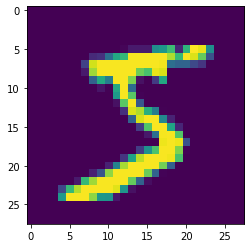

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
(X_train.max() , X_test.max())

(255, 255)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [11]:
X_train[0].shape

(28, 28, 1)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
input_shape = X_train[0].shape

In [14]:
model = Sequential()
model.add(Conv2D( filters =32, kernel_size = (3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D( 64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 ,activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history= model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 1177s 3s/step - loss: 0.2409 - accuracy: 0.9273 - val_loss: 0.0569 - val_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 998s 2s/step - loss: 0.0829 - accuracy: 0.9753 - val_loss: 0.0419 - val_accuracy: 0.9860
Epoch 3/10
469/469 [==============================] - 1397s 3s/step - loss: 0.0656 - accuracy: 0.9802 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 1245s 3s/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 1456s 3s/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 1367s 3s/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 1023s 2s/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0305 - val_accuracy: 

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 64s 204ms/step - loss: 0.0282 - accuracy: 0.9927


[0.028199991211295128, 0.9926999807357788]